### Random Search Cross Validation in Scikit-Learn

In [58]:
import pandas as pd
import numpy as np

import copy


data = pd.read_csv('Dataset/itu_Estimted_QoE.csv')
display(data.shape)

display(data.head(5))

(2090, 4)

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu
0,0,1,5,3.119406
1,1,3,5,4.282069
2,2,2,5,4.278156
3,3,3,5,4.278085
4,4,2,5,4.275066


In [71]:
from sklearn.preprocessing import KBinsDiscretizer

X = data['QoE_itu'].values.reshape(-1, 1)
#est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
est = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
est = est.fit(X)
Xt = est.transform(X)

display(Xt)

array([[2.],
       [3.],
       [3.],
       ...,
       [1.],
       [2.],
       [2.]])

In [72]:
data['itu_QoE_Class'] = Xt + 1

data['FEEDBACK_VALUE'] = data['FEEDBACK_VALUE'].replace(5, 4)
display(data.head(5))
#display(data.shape)

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,itu_QoE_Class
0,0,1,5,3.119406,3.0
1,1,3,5,4.282069,4.0
2,2,2,5,4.278156,4.0
3,3,3,5,4.278085,4.0
4,4,2,5,4.275066,4.0


In [73]:
# FB 1
mos_feedback = 1
df_user_fb_1 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_1 = df_user_fb_1.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_1['Frequency %'] = groupby_itu_cl_1['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_1['FEEDBACK_VALUE'].values)
groupby_itu_cl_1['MoS_Feedback'] = str(1)


display()
display(np.sum(groupby_itu_cl_1['Frequency %'].values))
display(groupby_itu_cl_1['Frequency %'].values)
display(groupby_itu_cl_1)

# FB 2
mos_feedback = 2
df_user_fb_2 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_2 = df_user_fb_2.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_2['Frequency %'] = groupby_itu_cl_2['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_2['FEEDBACK_VALUE'])
groupby_itu_cl_2['MoS_Feedback'] = str(2)

display(np.sum(groupby_itu_cl_2['FEEDBACK_VALUE'].values))
display(np.sum(groupby_itu_cl_2['Frequency %'].values))
display(np.sum(groupby_itu_cl_2['Frequency %'].values))
display(groupby_itu_cl_2)
# FB 3
mos_feedback = 3
# groupby_itu_cl_3 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
df_user_fb_3 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_3 = df_user_fb_3.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_3['Frequency %'] = groupby_itu_cl_3['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_3['FEEDBACK_VALUE'])
groupby_itu_cl_3['MoS_Feedback'] = str(3)

display(np.sum(groupby_itu_cl_3['FEEDBACK_VALUE'].values))
display(groupby_itu_cl_3)

# FB 4
mos_feedback = 4
df_user_fb_4 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
groupby_itu_cl_4 = df_user_fb_4.groupby(['itu_QoE_Class']).count().reset_index()
groupby_itu_cl_4['Frequency %'] = groupby_itu_cl_4['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'])
groupby_itu_cl_4['MoS_Feedback'] = str(4)

display(np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'].values))
display(groupby_itu_cl_4)

# Q1 = col_qoe_itu.quantile(.25)
# Q3_2 = col_qoe_itu.quantile(.75)
# print('Max: %.5f Min: %.5f Median: %.5f Mean_2: %.5f Q1: %.5f Q3_23: %.5f' %(maximum, minimum, median_2, mean_2, Q1, Q3_2))

# FB 4
# mos_feedback = 5
# df_user_fb_5 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
# groupby_itu_cl_5 = df_user_fb_5.groupby(['itu_QoE_Class']).count().reset_index()
# groupby_itu_cl_5['Frequency %'] = groupby_itu_cl_5['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_5['FEEDBACK_VALUE'])
# groupby_itu_cl_5['MoS_Feedback'] = str(5)

# display(np.sum(groupby_itu_cl_5['FEEDBACK_VALUE'].values))
# display(groupby_itu_cl_5)

1.0

array([0.51824818, 0.24817518, 0.14963504, 0.08394161])

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,142,142,142,142,0.518248,1
1,2.0,68,68,68,68,0.248175,1
2,3.0,41,41,41,41,0.149635,1
3,4.0,23,23,23,23,0.083942,1


161

1.0

1.0

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,36,36,36,36,0.223602,2
1,2.0,75,75,75,75,0.465839,2
2,3.0,34,34,34,34,0.211180,2
3,4.0,16,16,16,16,0.099379,2


228

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,62,62,62,62,0.271930,3
1,2.0,60,60,60,60,0.263158,3
2,3.0,76,76,76,76,0.333333,3
3,4.0,30,30,30,30,0.131579,3


1427

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,280,280,280,280,0.196216,4
1,2.0,312,312,312,312,0.218641,4
2,3.0,377,377,377,377,0.264191,4
3,4.0,458,458,458,458,0.320953,4


In [74]:
sum1 = np.sum(groupby_itu_cl_1['FEEDBACK_VALUE'].values)
sum2 = np.sum(groupby_itu_cl_2['FEEDBACK_VALUE'].values)
sum3 = np.sum(groupby_itu_cl_3['FEEDBACK_VALUE'].values)
sum4 = np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'].values)
#sum5 = np.sum(groupby_itu_cl_5['FEEDBACK_VALUE'].values)
sum5 = 0

print('sum all: ', sum1 + sum2 + sum3 + sum4 + sum5)

sum all:  2090


### User Feedback 4 and 5

In [75]:
def _convert_class_str(X_target):
    """ Convert string to float
    """
    return 'MoS_' + str(X_target)

display(_convert_class_str(1))

'MoS_1'

In [76]:
# df_itus = []
# for i in np.arange(1, 6, 1):
#     df_itus.append(pd.DataFrame('groupby_itu_cl_' + str(i)))
    
# print(df_itus)

#df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_3, groupby_itu_cl_4, groupby_itu_cl_5]
df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_3, groupby_itu_cl_4]
df_itu_qoe_class = pd.concat(df_itus)
display(df_itu_qoe_class.head(5))

# Convert MoS to string
df_itu_qoe_class['MoS_Feedback_Class'] = df_itu_qoe_class['MoS_Feedback'].apply(lambda x: _convert_class_str(x))

# Round Freq to 2 decimals
df_itu_qoe_class['Frequency_Round %'] = np.round(df_itu_qoe_class['Frequency %'], 2)


#display(df_itu_qoe_class)

# Pivot DF
df_MoS_Feedback_IUT_QoE_Class = pd.pivot_table(df_itu_qoe_class, values='Frequency_Round %', columns=['itu_QoE_Class'], index=['MoS_Feedback_Class'])


#df_MoS_Feedback_IUT_QoE_Class['5'] = float("{0:.6f}".format(0.0))

#display(df_MoS_Feedback_IUT_QoE_Class)

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1.0,142,142,142,142,0.518248,1
1,2.0,68,68,68,68,0.248175,1
2,3.0,41,41,41,41,0.149635,1
3,4.0,23,23,23,23,0.083942,1
0,1.0,36,36,36,36,0.223602,2


In [77]:
#df_MoS_Feedback_IUT_QoE_Class.to_csv('Dataset/MoS_Feedback_IUT_QoE_Class_Group4-5.csv')

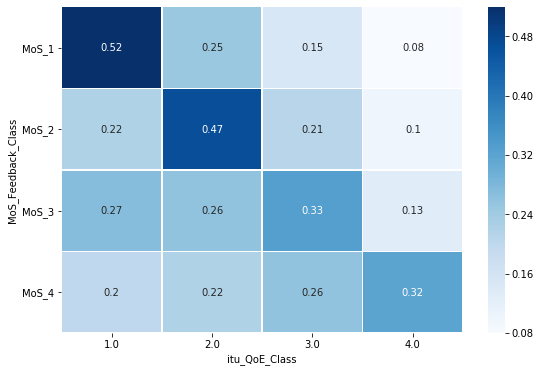

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot heatmap
plt.figure(figsize=(9,6))
ax = sns.heatmap(df_MoS_Feedback_IUT_QoE_Class, annot=True, linewidths=.5, cmap='Blues')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

plt.show()